# Load nesessary libraries and Dataset

In [6]:
# Nesessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load Data into data frame 
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Data analysis 

In [8]:
# obtain Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Check how many NaN values are in each column 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Replace NaN values in bmi column with the mean of bmi values  

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df['bmi'] = imp_mean.fit_transform(df['bmi'].values.reshape(-1,1))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
# drop any irrelevant column 
df.drop(["id"], axis = 1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [12]:
# Check if there is any Duplicate value in data 
print(df.duplicated().sum())

0


In [13]:
# Check Frequency of Value in a Columns that have object data type
for i in df:
    if df[i].dtypes == 'object':
        print('{0}\n'.format(df[i].value_counts()))

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [14]:
# remove an odd value in gender
for x in df.index:
    if df.loc[x, 'gender'] == 'Other':
        df.drop(x, inplace = True)

In [15]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [16]:
# Adjust index of data frame
df = df.reset_index(drop = True)
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0
5108,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.200000,Unknown,0


# Data Visualization 

In [17]:
df.corr() # correlation between features 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.325858,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.160147,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.038862,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.168910,0.131991
bmi,0.325858,0.160147,0.038862,0.168910,1.000000,0.038912
stroke,0.245239,0.127891,0.134905,0.131991,0.038912,1.000000


<AxesSubplot:>

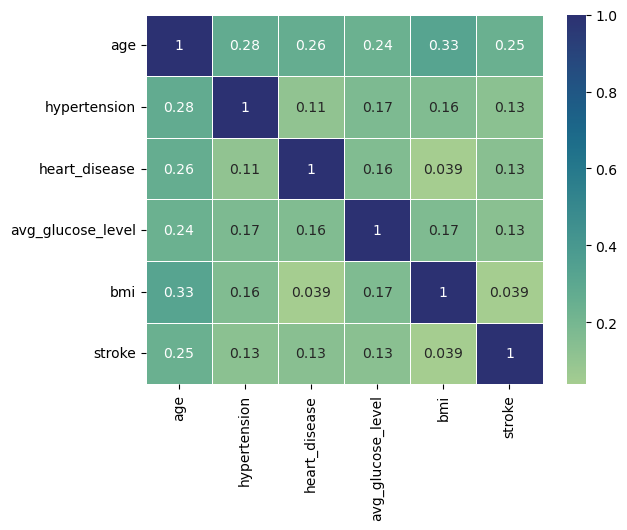

In [18]:
# Heat map to represent correlation between features
sns.heatmap(df.corr(), annot=True, linewidth=.5, cmap="crest")

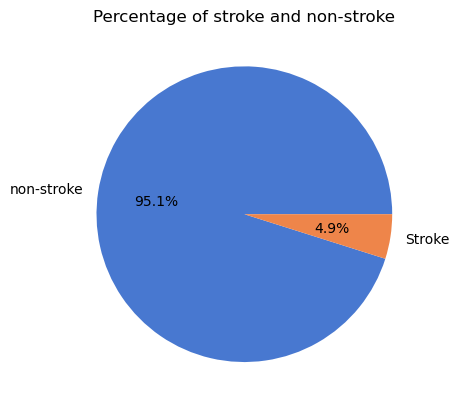

In [19]:
# pie chart to visualise percentages of patients who had stroke
plt.figure("Percentage of stroke and non-stroke")

labels = ['non-stroke', 'Stroke']
color = sns.color_palette('muted')

plt.pie(df['stroke'].value_counts(), labels=labels, autopct='%1.1f%%', colors=color)
plt.title("Percentage of stroke and non-stroke")
plt.show()

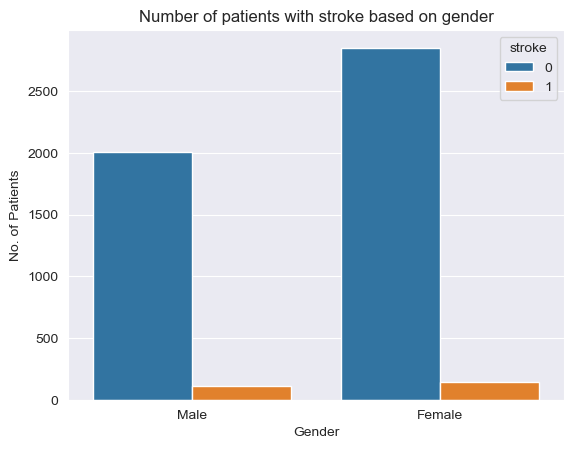

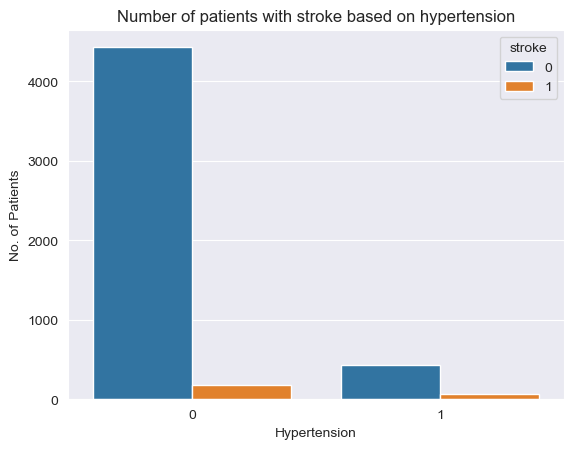

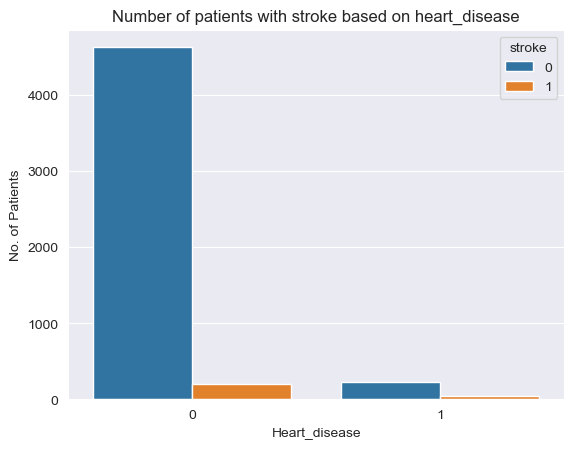

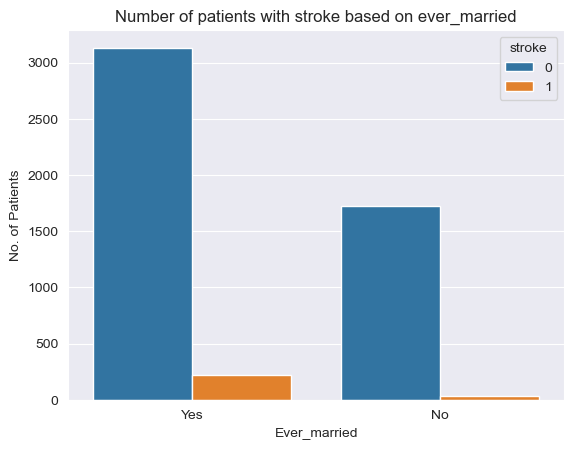

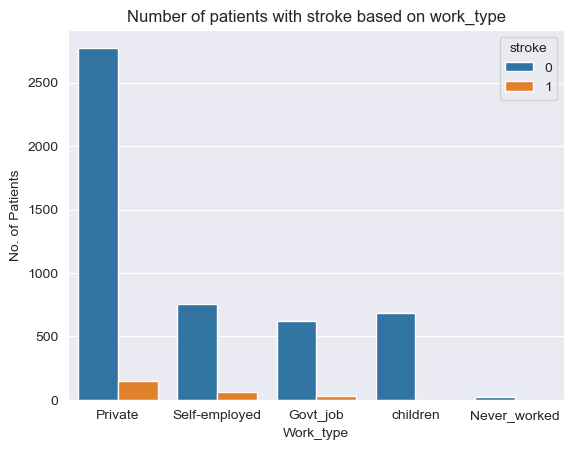

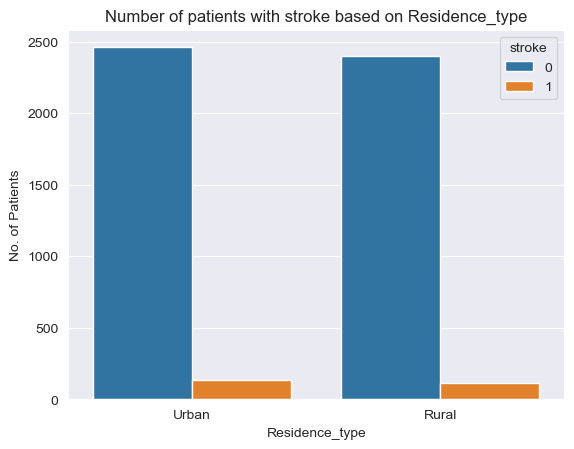

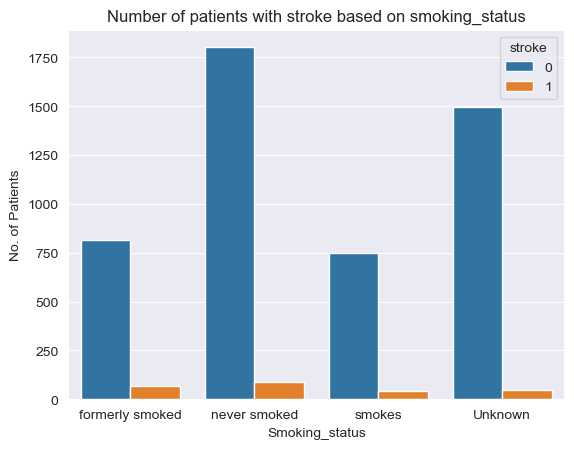

In [20]:
# A for loop to visualize all the categorical and boolean data with barcharts 
for i in df.drop(['stroke'], axis=1):                          # exclude stroke data
    if df[i].dtype == 'int64' or df[i].dtype == 'object':
        sns.set_style("darkgrid")
        sns.countplot(data=df, x=i, hue='stroke')
        plt.title("Number of patients with stroke based on {0}".format(i))
        plt.xlabel(i.capitalize())
        plt.ylabel('No. of Patients')
        plt.show()

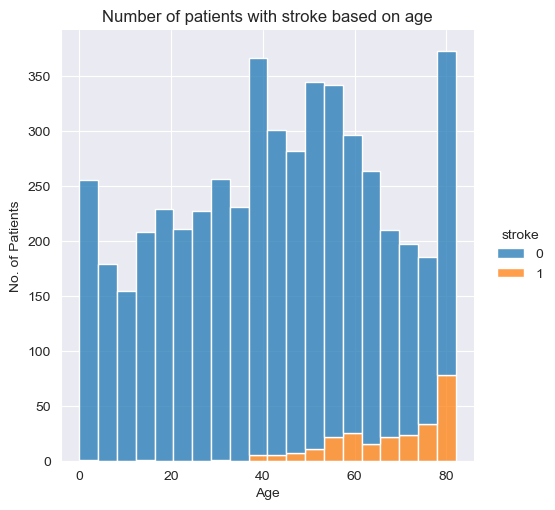

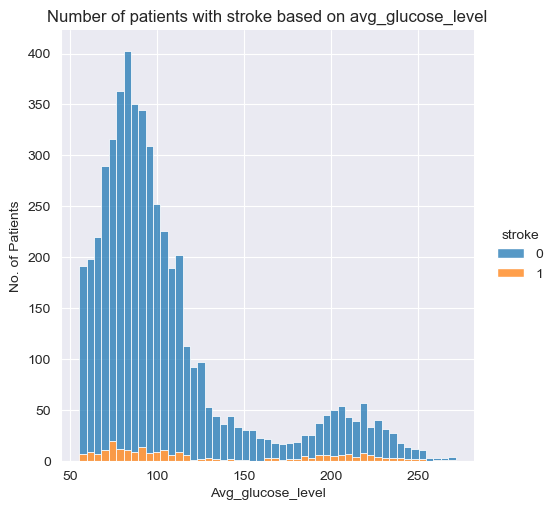

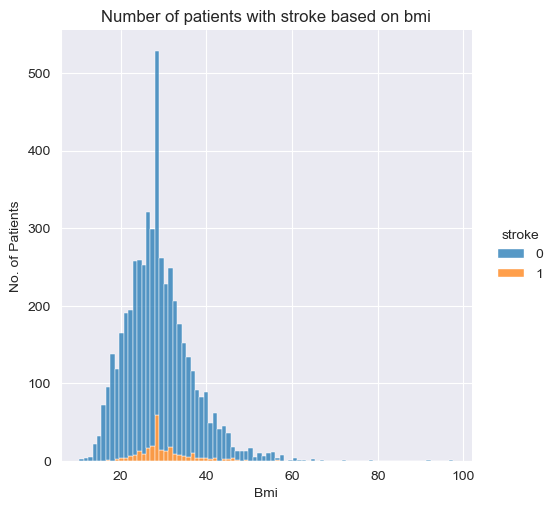

In [21]:
# visualizing numeric data 
for i in df.drop(['stroke'], axis=1):                          # exclude stroke data
    if df[i].dtype == 'float64':
        sns.set_style("darkgrid")

        sns.displot(df, x=i, hue='stroke',  multiple="stack")
        plt.title("Number of patients with stroke based on {0}".format(i))
        plt.xlabel(i.capitalize())
        plt.ylabel('No. of Patients')
        plt.show()

# Pre-processing 

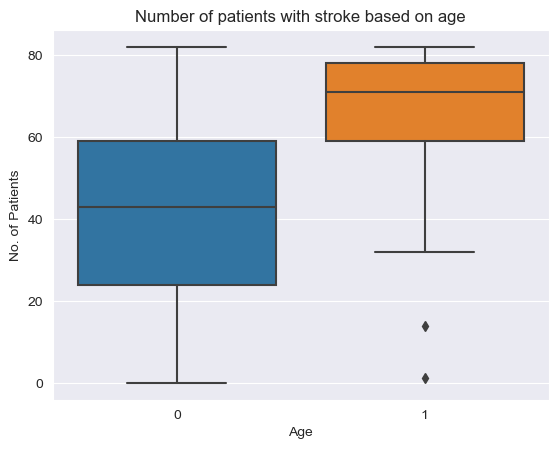

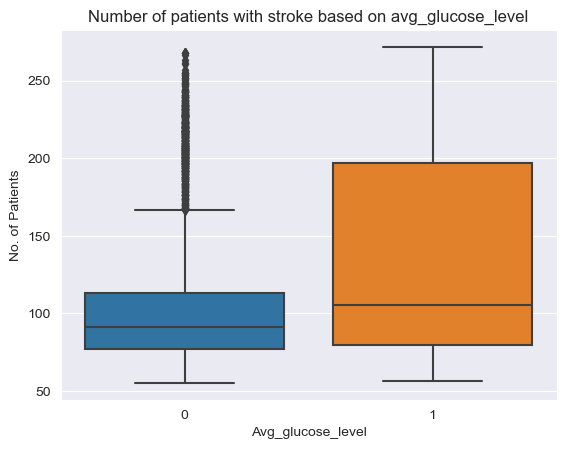

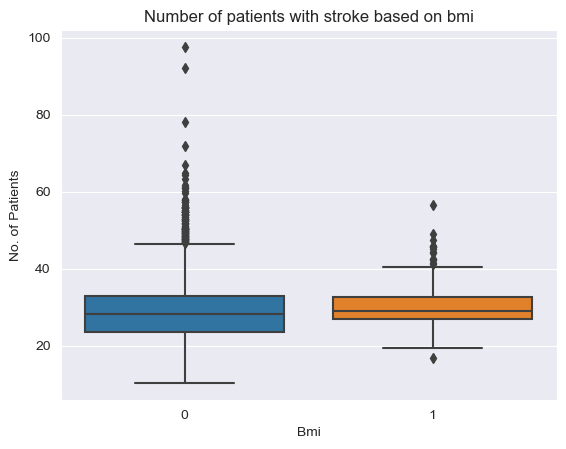

In [22]:
# using Boxplot to visualise distribution of numerical data and spotting outliers
for i in df.drop(['stroke'], axis=1):                          # exclude stroke data
    if df[i].dtype == 'float64':
        sns.set_style("darkgrid")
        sns.boxplot(df, x=df["stroke"], y=i)
        plt.title("Number of patients with stroke based on {0}".format(i))
        plt.xlabel(i.capitalize())
        plt.ylabel('No. of Patients')
        plt.show()

In [23]:
# Removing outliers from dataset 

# get outlier's index from age column 
index_age = df[((df['age'] < 20) & (df['stroke'] == 1))].index
df.drop(index_age , inplace=True)

# get outlier's index from avg_glucose_level column 
index_avg_glucose_level = df[((df['avg_glucose_level'] > 210) & (df['stroke'] == 0))].index
df.drop(index_avg_glucose_level , inplace=True)

# get outlier's index from bmi column 
index_bmi = df[((df['bmi'] > 50) & (df['stroke'] == 0))].index
index_bmi = df[((df['bmi'] > 40) & (df['stroke'] == 1))].index
index_bmi = df[((df['bmi'] < 19) & (df['stroke'] == 1))].index
df.drop(index_bmi , inplace=True)

In [24]:
# One-Hot-Encoding
# changing categorical features into 0 and 1 values
print("Original features:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df)
print("Features after get_dummies:\n", list(df_dummies.columns))

Original features:
 ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'] 

Features after get_dummies:
 ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


In [25]:
df_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [26]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 5108
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4837 non-null   float64
 1   hypertension                    4837 non-null   int64  
 2   heart_disease                   4837 non-null   int64  
 3   avg_glucose_level               4837 non-null   float64
 4   bmi                             4837 non-null   float64
 5   stroke                          4837 non-null   int64  
 6   gender_Female                   4837 non-null   uint8  
 7   gender_Male                     4837 non-null   uint8  
 8   ever_married_No                 4837 non-null   uint8  
 9   ever_married_Yes                4837 non-null   uint8  
 10  work_type_Govt_job              4837 non-null   uint8  
 11  work_type_Never_worked          4837 non-null   uint8  
 12  work_type_Private               48

In [27]:
# changing feature's data type to int64 
for i in df_dummies:
    df_dummies[i] = df_dummies[i].astype('int64')
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 0 to 5108
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             4837 non-null   int64
 1   hypertension                    4837 non-null   int64
 2   heart_disease                   4837 non-null   int64
 3   avg_glucose_level               4837 non-null   int64
 4   bmi                             4837 non-null   int64
 5   stroke                          4837 non-null   int64
 6   gender_Female                   4837 non-null   int64
 7   gender_Male                     4837 non-null   int64
 8   ever_married_No                 4837 non-null   int64
 9   ever_married_Yes                4837 non-null   int64
 10  work_type_Govt_job              4837 non-null   int64
 11  work_type_Never_worked          4837 non-null   int64
 12  work_type_Private               4837 non-null   int64
 13  wor

<AxesSubplot:>

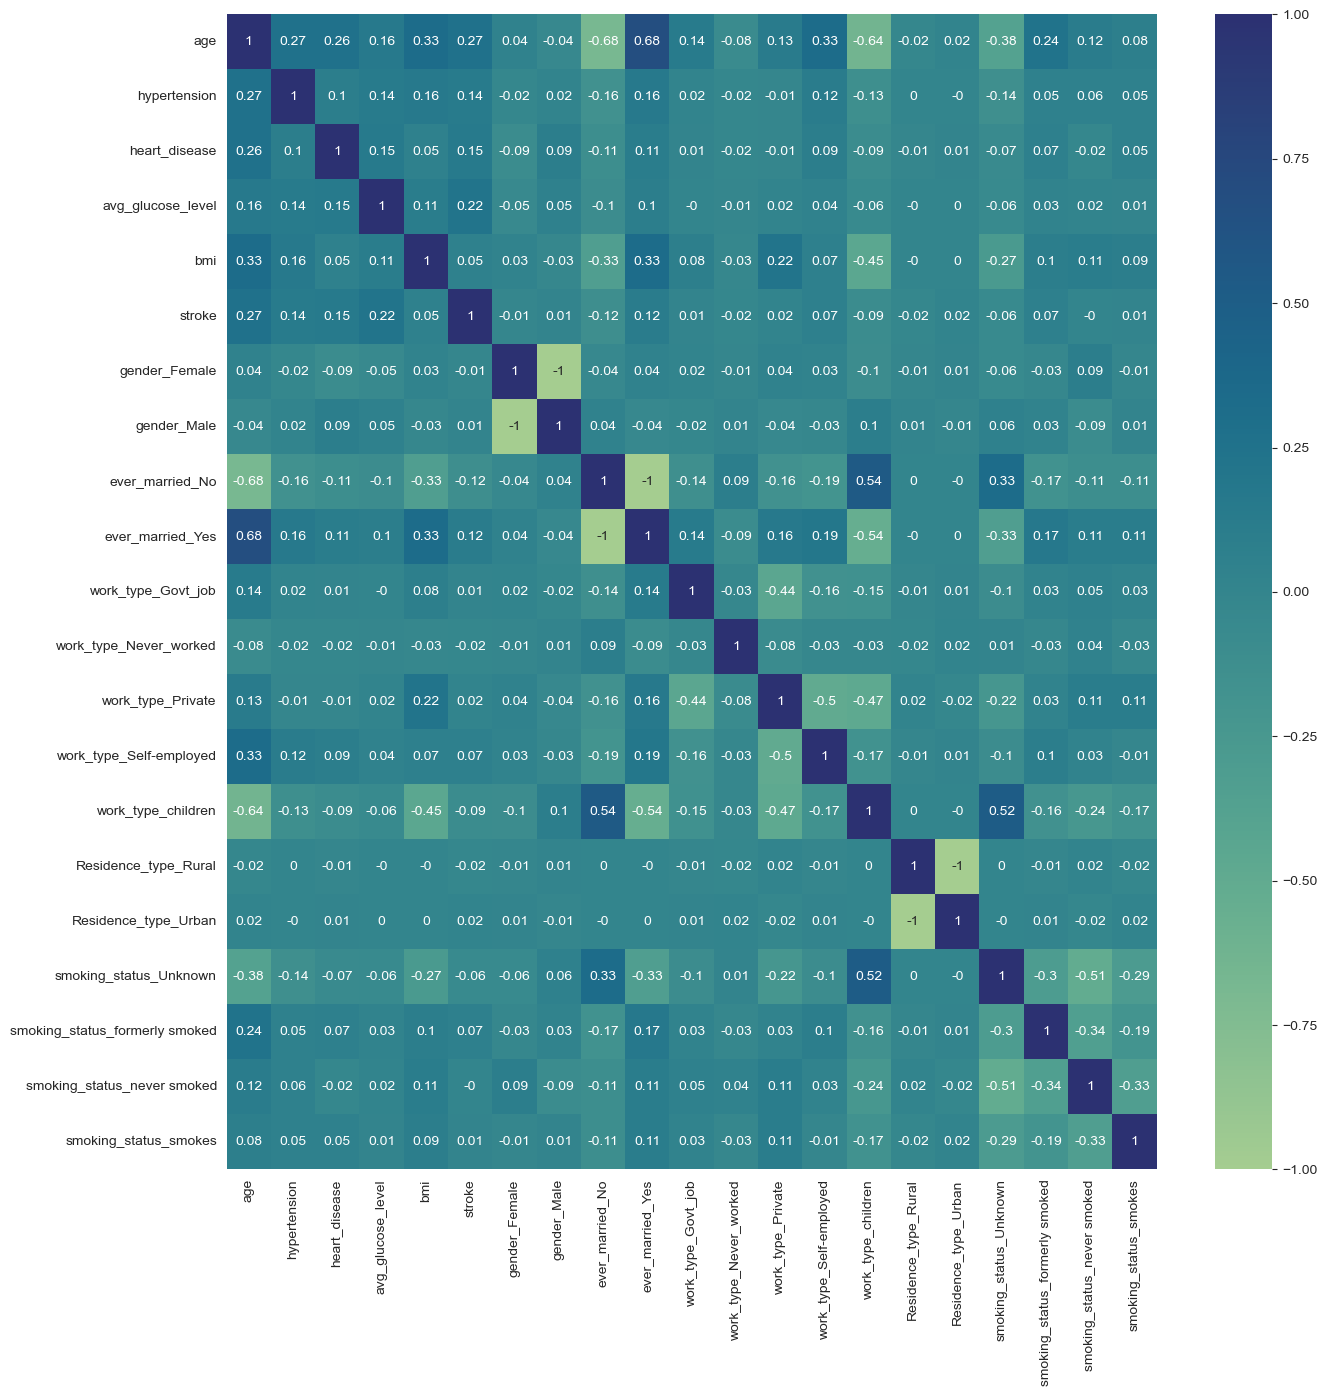

In [28]:
# Correlation Heatmap 
plt.figure(figsize=(15,15))
sns.heatmap(df_dummies.corr().round(2), annot=True, cmap="crest")

In [29]:
# Split data into Features and Target variables
X = df_dummies.drop(['stroke'], axis=1)
Y = df_dummies['stroke']

In [30]:
# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Applying PCA to reduce the number of dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))



Original shape: (4837, 20)
Reduced shape: (4837, 14)


In [32]:
# Splitting dataset into testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, random_state=0)

In [33]:
# using SMOTE (Synthetic Minority Oversampling Technique) for Oversampling
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Original dataset shape: {}".format(Counter(y_train)))
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print("Resampled dataset shape: {}".format(Counter(y_train)))

Original dataset shape: Counter({0: 3445, 1: 182})
Resampled dataset shape: Counter({0: 3445, 1: 3445})


# Machine Learning Models 

## First model 

In [34]:
# LogisticRegression 
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
pred_logreg = LogReg.predict(X_test)                               # store predicted results in variable
print("Test score: {0:.6f}".format(LogReg.score(X_test, y_test)))
print("Traning score: {0:.6f}".format(LogReg.score(X_train, y_train)))

Test score: 0.766116
Traning score: 0.820464


### Cross-Validation 

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogReg, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

# Average score
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.80406386 0.82801161 0.80624093 0.83962264 0.82075472]
Average cross-validation score: 0.82


### Confusion matrices 

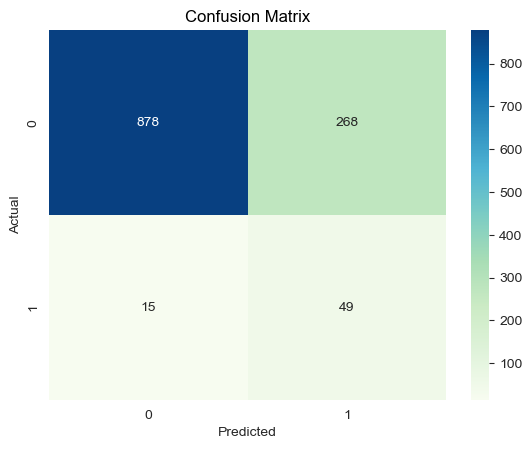

In [36]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
sns.heatmap(confusion,annot=True,cmap='GnBu',fmt = 'd')
plt.title('Confusion Matrix',color='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

### Classification Repot 

In [37]:
#comprehensive summary of precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg,  target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.98      0.77      0.86      1146
      Stroke       0.15      0.77      0.26        64

    accuracy                           0.77      1210
   macro avg       0.57      0.77      0.56      1210
weighted avg       0.94      0.77      0.83      1210



### Model Tuning 

In [38]:
# Function to plot the results
# Referance - https://scikit-learn.org/0.24/auto_examples/model_selection/plot_grid_search_stats.html 
def plot_results(search):
    results_df = pd.DataFrame(search.cv_results_)
    results_df = results_df.sort_values(by=['rank_test_score'])
    results_df = results_df.iloc[:5]                        # choose top 5 results
    results_df = (
        results_df
        .set_index(results_df["params"].apply(
            lambda x: "_".join(str(val) for val in x.values()))
        )
        .rename_axis('kernel')
    )

    # create df of model scores ordered by perfomance
    model_scores = results_df.filter(regex=r'split\d*_test_score')
    model_scores.dropna(inplace = True)
    
    # plot 20 examples of dependency between cv fold and AUC scores
    fig, ax = plt.subplots()
    sns.lineplot(
        data=model_scores.transpose().iloc[:20],
        dashes=False, palette='Set1', marker='o', alpha=.5, ax=ax
    )
    ax.set_xlabel("CV test fold", size=12, labelpad=10)
    ax.set_ylabel("Model AUC", size=12)
    ax.tick_params(bottom=True, labelbottom=False)
    ax.legend(bbox_to_anchor=(1, 1))
    plt.show()
    # End 
    # https://scikit-learn.org/0.24/auto_examples/model_selection/plot_grid_search_stats.html

#### Random Search 

In [39]:
%%capture --no-display
# random search logistic regression model on the sonar dataset
# Referace - https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)   #Repeated Stratified K-Fold cross validator

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = loguniform(1e-5, 100)

# define search
Randomized_search = RandomizedSearchCV(LogReg, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
Randomized_search_result = Randomized_search.fit(X_train, y_train)
#End 

In [40]:
# summarize result
print('Best Score: %s' % Randomized_search.best_score_)
print('Best Hyperparameters: %s' % Randomized_search.best_params_)

Best Score: 0.8240928882438318
Best Hyperparameters: {'C': 0.03973976592311112, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\manin\AppData\Local\Temp\ipykernel_35588\3527756237.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_scores.dropna(inplace = True)


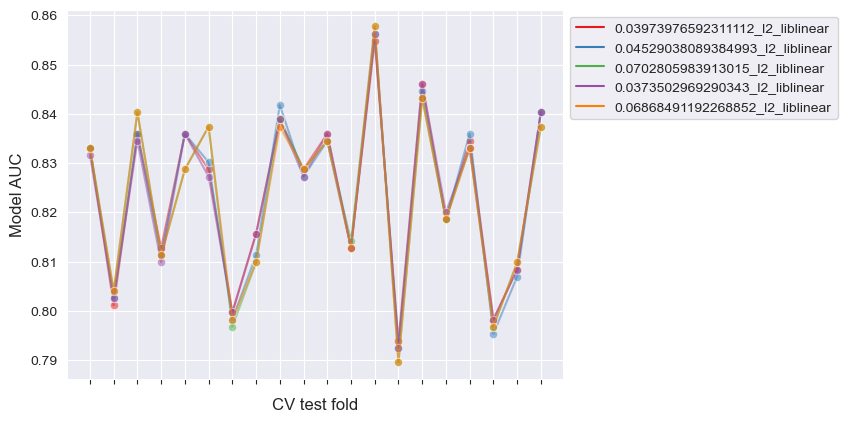

In [41]:
plot_results(Randomized_search)

#### Grid Search

In [42]:
%%capture --no-display
from sklearn.model_selection import GridSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)   #Repeated Stratified K-Fold cross validator

# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2']
space['C'] = [0.001, 0.01, 0.1, 1, 10, 100]

# define search
Grid_search = GridSearchCV(LogReg, space, scoring='accuracy', n_jobs=-1, cv=cv)  

# execute search
Grid_search_result = Grid_search.fit(X_train, y_train)

In [43]:
# summarize result
print('Best Score: %s' % Grid_search_result.best_score_)
print('Best Hyperparameters: %s' % Grid_search_result.best_params_)

Best Score: 0.822738268021287
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\manin\AppData\Local\Temp\ipykernel_35588\3527756237.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_scores.dropna(inplace = True)


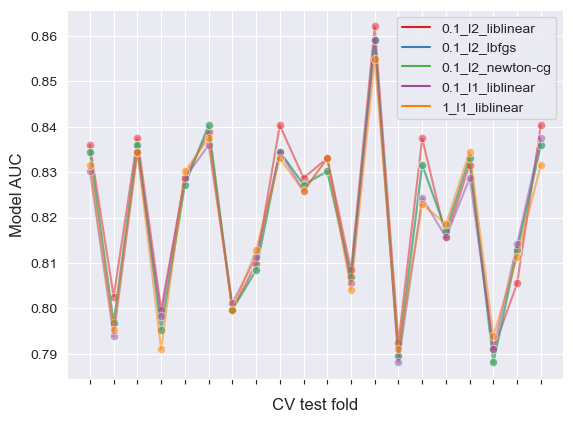

In [44]:
plot_results(Grid_search)

#### Tuning Results

In [45]:
print("Randomised Search")
print("The Best score of the Model: {:.4f}".format(Randomized_search.best_score_))
print("Parameters: ", Randomized_search.best_params_)
print("-" *50)
print("Grid Search")
print("The Best score of the Model:: {:.4f}".format(Grid_search_result.best_score_))
print("Parameters: ", Grid_search_result.best_params_)

Randomised Search
The Best score of the Model: 0.8241
Parameters:  {'C': 0.03973976592311112, 'penalty': 'l2', 'solver': 'liblinear'}
--------------------------------------------------
Grid Search
The Best score of the Model:: 0.8227
Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


##### Confusion matrices using best Parameters 

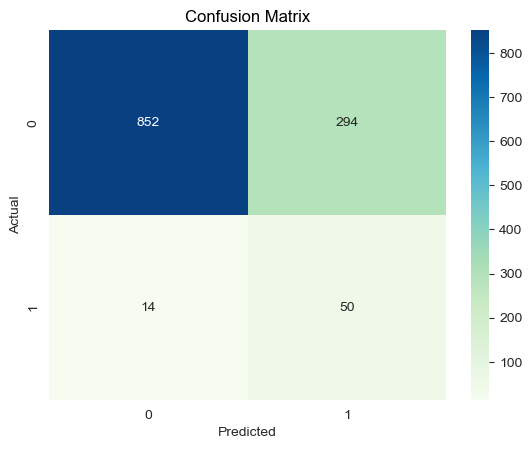

In [46]:
parameters = list(Randomized_search.best_params_.values())
best_LogReg_model = LogisticRegression(C = parameters[0], penalty = parameters[1], solver = parameters[2])
best_LogReg_model.fit(X_train,y_train)

best_pred_logreg = best_LogReg_model.predict(X_test)

confusion = confusion_matrix(y_test, best_pred_logreg)
sns.heatmap(confusion,annot=True,cmap='GnBu',fmt = 'd')
plt.title('Confusion Matrix',color='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Receiver Operating Characteristic

C:\Users\manin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


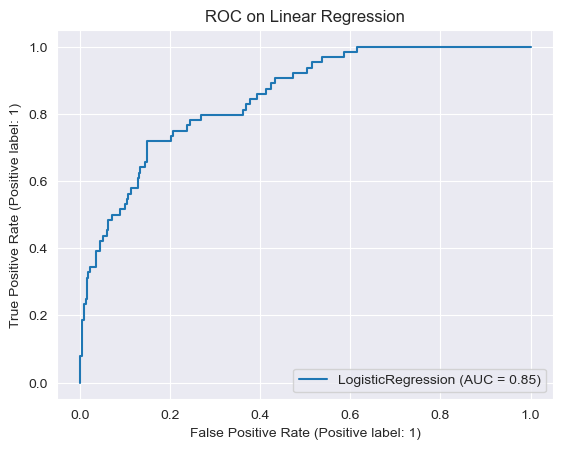

In [47]:
from sklearn import metrics
metrics.plot_roc_curve(best_LogReg_model, X_test, y_test)
plt.title('ROC on Linear Regression') 
plt.show()

##### classification report 

In [48]:
#comprehensive summary of precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, best_pred_logreg,  target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.98      0.74      0.85      1146
      Stroke       0.15      0.78      0.25        64

    accuracy                           0.75      1210
   macro avg       0.56      0.76      0.55      1210
weighted avg       0.94      0.75      0.82      1210



## Second Model 

In [44]:
# A Random forest classifier 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
pred_forest = forest.predict(X_test)                               # store predicted results in variable
print("Test score: {0:.6f}".format(forest.score(X_test, y_test)))
print("Traning score: {0:.6f}".format(forest.score(X_train, y_train)))

Test score: 0.898347
Traning score: 1.000000


### Cross-Validation 

In [45]:
scores = cross_val_score(forest, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

# Average score
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.94775036 0.94992743 0.94049347 0.96081277 0.9383164 ]
Average cross-validation score: 0.95


### Confusion matrices

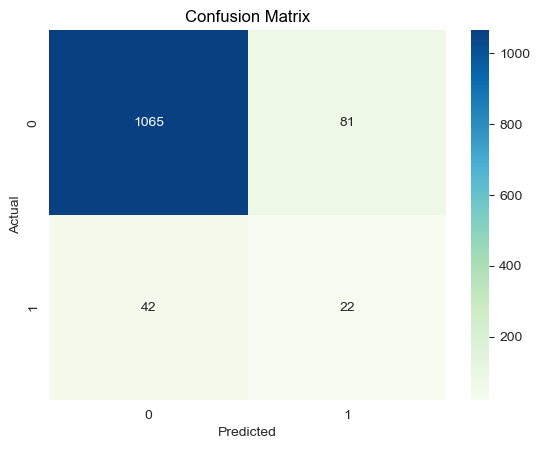

In [46]:
confusion = confusion_matrix(y_test, pred_forest)
sns.heatmap(confusion,annot=True,cmap='GnBu',fmt = 'd')
plt.title('Confusion Matrix',color='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

### Classification Repot

In [47]:
#comprehensive summary of precision, recall, and f1-score
print(classification_report(y_test, pred_forest,  target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.96      0.93      0.95      1146
      Stroke       0.21      0.34      0.26        64

    accuracy                           0.90      1210
   macro avg       0.59      0.64      0.60      1210
weighted avg       0.92      0.90      0.91      1210



### Model Tuning 

#### Random Search

In [48]:
%%capture --no-display
# random search logistic regression model on the sonar dataset
# Referace - https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  #Repeated Stratified K-Fold cross validator

# define search space
space = dict()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
space['n_estimators'] = n_estimators
# Number of features to consider at every split
space['max_features'] = ['auto', 'sqrt']
# Maximum number of levels in tree
space['max_depth'] = [2,4]
# Minimum number of samples required to split a node
space['min_samples_split'] = [2, 5]
# Minimum number of samples required at each leaf node
space['min_samples_leaf'] = [1, 2]
# Method of selecting samples for training each tree
space['bootstrap'] = [True, False]
# define search
Randomized_search = RandomizedSearchCV(forest, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
Randomized_search_result = Randomized_search.fit(X_train, y_train)
#End 

In [49]:
# summarize result
print('Best Score: %s' % Randomized_search.best_score_)
print('Best Hyperparameters: %s' % Randomized_search.best_params_)

Best Score: 0.8077406869859699
Best Hyperparameters: {'n_estimators': 90, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': True}


C:\Users\manin\AppData\Local\Temp\ipykernel_35280\3527756237.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_scores.dropna(inplace = True)


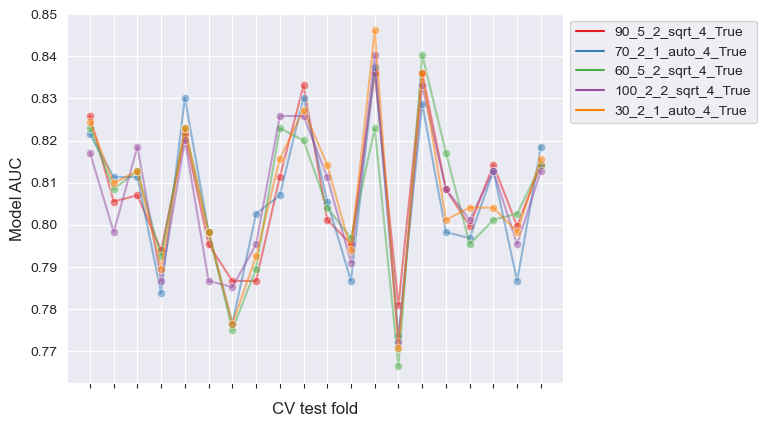

In [50]:
plot_results(Randomized_search)

#### Grid search 

In [51]:
%%capture --no-display
# random search logistic regression model on the sonar dataset
# Referace - https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  #Repeated Stratified K-Fold cross validator

# define search space
space = dict()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
space['n_estimators'] = n_estimators
# Number of features to consider at every split
space['max_features'] = ['auto', 'sqrt']
# Maximum number of levels in tree
space['max_depth'] = [2,4]
# Minimum number of samples required to split a node
space['min_samples_split'] = [2, 5]
# Minimum number of samples required at each leaf node
space['min_samples_leaf'] = [1, 2]

# define search
Grid_search = GridSearchCV(forest, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
Grid_search_result = Grid_search.fit(X_train, y_train)

In [52]:
# summarize result
print('Best Score: %s' % Grid_search_result.best_score_)
print('Best Hyperparameters: %s' % Grid_search_result.best_params_)

Best Score: 0.8086115142718917
Best Hyperparameters: {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 60}


C:\Users\manin\AppData\Local\Temp\ipykernel_35280\3527756237.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_scores.dropna(inplace = True)


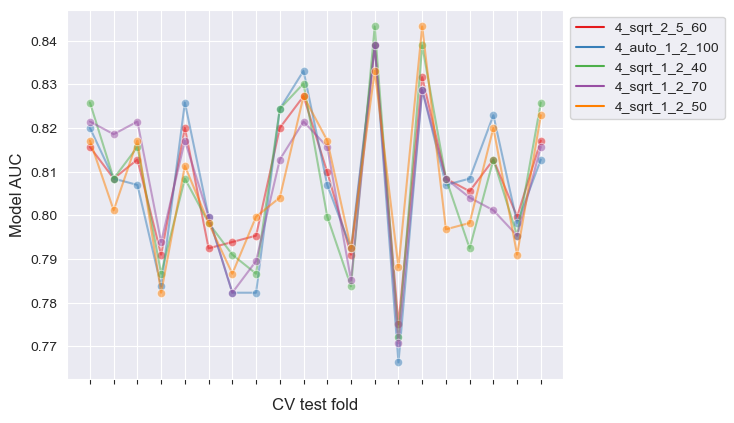

In [53]:
plot_results(Grid_search)

#### Tuning Results 

In [54]:
print("Randomised Search")
print("The Best score of the Model: {:.4f}".format(Randomized_search.best_score_))
print("Parameters: ", Randomized_search.best_params_)
print("-" *50)
print("Grid Search")
print("The Best score of the Model:: {:.4f}".format(Grid_search_result.best_score_))
print("Parameters: ", Grid_search_result.best_params_)

Randomised Search
The Best score of the Model: 0.8077
Parameters:  {'n_estimators': 90, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': True}
--------------------------------------------------
Grid Search
The Best score of the Model:: 0.8086
Parameters:  {'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 60}


##### Confusion matrices using best Parameters

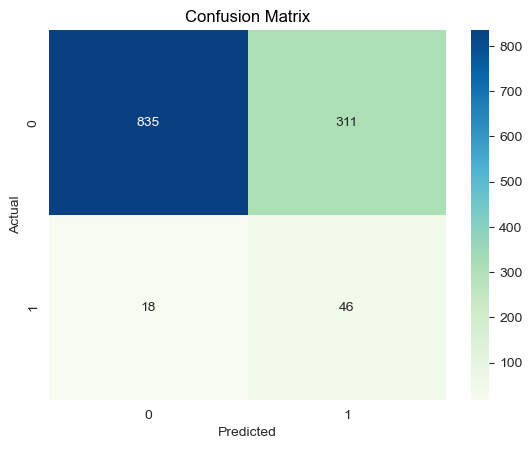

In [55]:
parameters = list(Randomized_search.best_params_.values())
best_forest_model = RandomForestClassifier(n_estimators = parameters[0],
                                           min_samples_split = parameters[1], 
                                           min_samples_leaf = parameters[2],
                                           max_features = parameters[3],
                                           max_depth = parameters[4],
                                           bootstrap= parameters[5],)
best_forest_model.fit(X_train,y_train)

best_pred_forest = best_forest_model.predict(X_test)

confusion = confusion_matrix(y_test, best_pred_forest)
sns.heatmap(confusion,annot=True,cmap='GnBu',fmt = 'd')
plt.title('Confusion Matrix',color='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Receiver Operating Characteristic

C:\Users\manin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


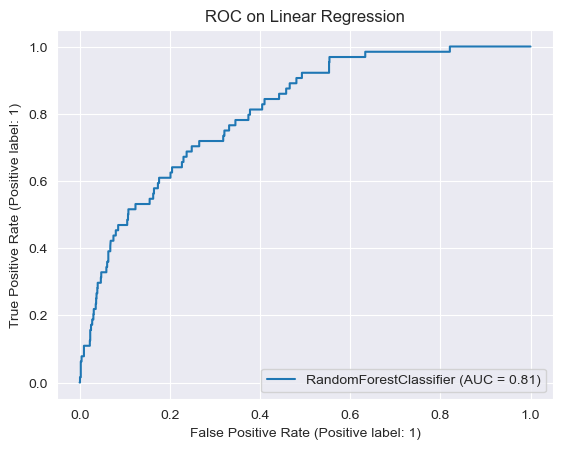

In [56]:
from sklearn import metrics
metrics.plot_roc_curve(best_forest_model, X_test, y_test)
plt.title('ROC on Linear Regression') 
plt.show()

##### classification report

In [57]:
#comprehensive summary of precision, recall, and f1-score
print(classification_report(y_test, best_pred_forest,  target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.98      0.73      0.84      1146
      Stroke       0.13      0.72      0.22        64

    accuracy                           0.73      1210
   macro avg       0.55      0.72      0.53      1210
weighted avg       0.93      0.73      0.80      1210



## Third Model 

In [51]:
# Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
pred_mlp = mlp.predict(X_test)                               # store predicted results in variable
print("Test score: {0:.6f}".format(mlp.score(X_test, y_test)))
print("Traning score: {0:.6f}".format(mlp.score(X_train, y_train)))

Test score: 0.877686
Traning score: 0.967054


### Cross-Validation

In [52]:
scores = cross_val_score(mlp, X_train, y_train, cv=5)
print("Cross-validation scores: {}".format(scores))

# Average score
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.94702467 0.94339623 0.9383164  0.94992743 0.93976778]
Average cross-validation score: 0.94


### Confusion matrices

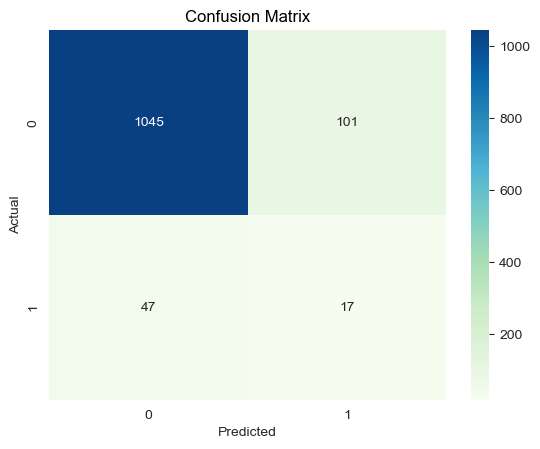

In [54]:
confusion = confusion_matrix(y_test, pred_mlp)
sns.heatmap(confusion,annot=True,cmap='GnBu',fmt = 'd')
plt.title('Confusion Matrix',color='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show() 

### Classification Repot

In [56]:
#comprehensive summary of precision, recall, and f1-score
print(classification_report(y_test, pred_mlp,  target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.96      0.91      0.93      1146
      Stroke       0.14      0.27      0.19        64

    accuracy                           0.88      1210
   macro avg       0.55      0.59      0.56      1210
weighted avg       0.91      0.88      0.89      1210



### Model Tuning 

#### Random Search 

In [65]:
%%capture --no-display
# random search logistic regression model on the sonar dataset
# Referace - https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)   #Repeated Stratified K-Fold cross validator

# define search space
space = dict()
space['hidden_layer_sizes'] = [(50,50,50), (50,100,50), (100,)]
space['activation'] = ['tanh', 'relu']
space['solver'] = ['sgd', 'adam']
space['alpha'] =  [0.0001, 0.05]
space['learning_rate'] = ['constant','adaptive']


# define search
Randomized_search = RandomizedSearchCV(mlp, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
Randomized_search_result = Randomized_search.fit(X_train, y_train)
#End 

In [66]:
# summarize result
print('Best Score: %s' % Randomized_search.best_score_)
print('Best Hyperparameters: %s' % Randomized_search.best_params_)

Best Score: 0.942718916303822
Best Hyperparameters: {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation': 'relu'}


C:\Users\manin\AppData\Local\Temp\ipykernel_35588\3527756237.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_scores.dropna(inplace = True)


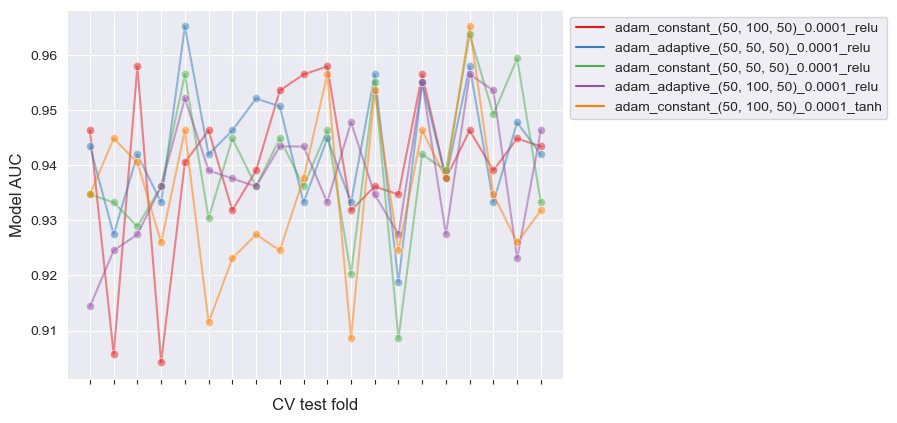

In [67]:
plot_results(Randomized_search)

#### Grid Search 

In [68]:
%%capture --no-display
from sklearn.model_selection import GridSearchCV

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['hidden_layer_sizes'] = [(50,50,50), (50,100,50), (100,)]
space['activation'] = ['tanh', 'relu']
space['solver'] = ['sgd', 'adam']
space['alpha'] =  [0.0001, 0.05]
space['learning_rate'] = ['constant','adaptive']


# define search
Grid_search = GridSearchCV(mlp, space, scoring='accuracy', n_jobs=-1, cv=cv)

# execute search
Grid_search_result = Grid_search.fit(X_train, y_train)

In [69]:
# summarize result
print('Best Score: %s' % Grid_search_result.best_score_)
print('Best Hyperparameters: %s' % Grid_search_result.best_params_)

Best Score: 0.9416545718432512
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


C:\Users\manin\AppData\Local\Temp\ipykernel_35588\3527756237.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_scores.dropna(inplace = True)


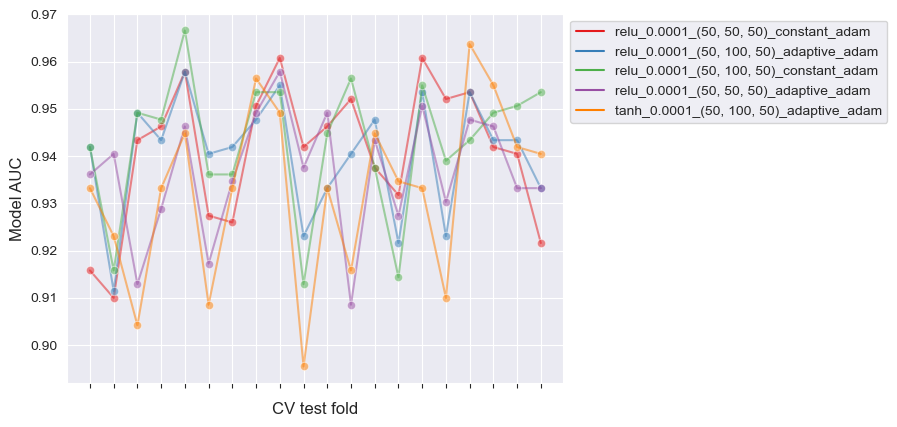

In [70]:
plot_results(Grid_search)

#### Tunning Results 

In [71]:
print("Randomised Search")
print("The Best score of the Model: {:.4f}".format(Randomized_search.best_score_))
print("Parameters: ", Randomized_search.best_params_)
print("-" *50)
print("Grid Search")
print("The Best score of the Model:: {:.4f}".format(Grid_search_result.best_score_))
print("Parameters: ", Grid_search_result.best_params_)

Randomised Search
The Best score of the Model: 0.9427
Parameters:  {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50, 100, 50), 'alpha': 0.0001, 'activation': 'relu'}
--------------------------------------------------
Grid Search
The Best score of the Model:: 0.9417
Parameters:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


##### Confusion matrices using best Parameters 

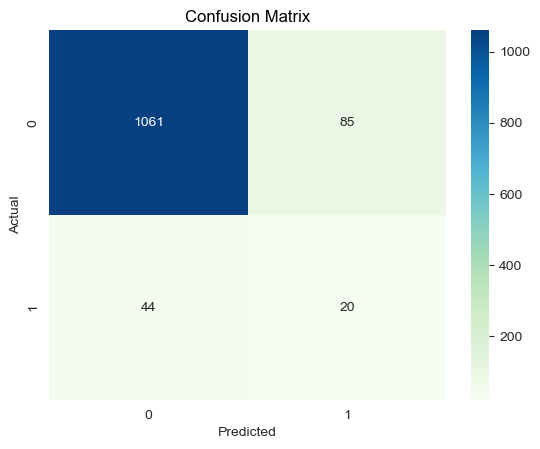

In [72]:
parameters = list(Randomized_search.best_params_.values()) # change if possible 
best_mlp_model = MLPClassifier(solver = parameters[0],  #change parameters 
                               learning_rate = parameters[1], 
                               hidden_layer_sizes = parameters[2],
                               alpha = parameters[3],
                               activation = parameters[4],
                               max_iter=1000)
best_mlp_model.fit(X_train,y_train)

best_pred_mlp = best_mlp_model.predict(X_test)

confusion = confusion_matrix(y_test, best_pred_mlp)
sns.heatmap(confusion,annot=True,cmap='GnBu',fmt = 'd')
plt.title('Confusion Matrix',color='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Receiver Operating Characteristic

C:\Users\manin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


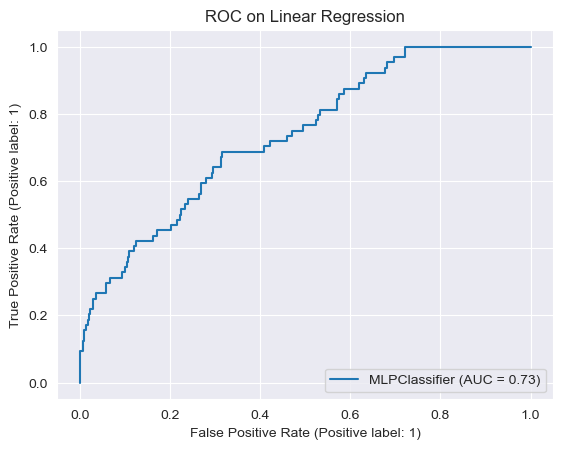

In [73]:
from sklearn import metrics
metrics.plot_roc_curve(best_mlp_model, X_test, y_test)
plt.title('ROC on Linear Regression') 
plt.show()

In [74]:
#comprehensive summary of precision, recall, and f1-score
print(classification_report(y_test, best_pred_mlp,  target_names=["No Stroke", "Stroke"]))

              precision    recall  f1-score   support

   No Stroke       0.96      0.93      0.94      1146
      Stroke       0.19      0.31      0.24        64

    accuracy                           0.89      1210
   macro avg       0.58      0.62      0.59      1210
weighted avg       0.92      0.89      0.91      1210

